### In this lab, you will learn how to extract data with HTML tags.
<b>Beautiful Soup</b> is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.<br>
Every page on the web is composed of HTML tags. If you go to any web page and right click and select inspect source you would be able to see the structure of a web page.

Open up your web browser and right click to see the menu.
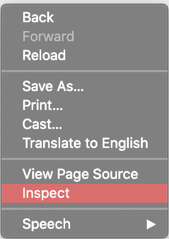

HTML looks like this!
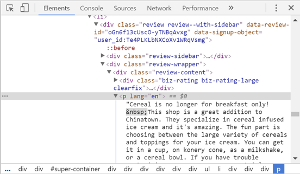

<b>Step 1: Install Beautifulsoup Package </b><br>
Open your command line window (Terminal) and run the following command to install BeautifulSoup package.<br>
<br>
<code>pip install beautifulsoup4</code><br>
<br>
<b>Step 2: Run the following code to crawl the reviews</b>
<br>
In this example, we will collect reviews from Yelp. The link to the webpage is here: 
https://www.yelp.com/biz/milk-and-cream-cereal-bar-new-york?osq=Ice+Cream

In [34]:
# Import packages
from bs4 import BeautifulSoup
import urllib.request

In [35]:
# TODO: paste the url of the website here.
url = 'https://www.yelp.com/biz/milk-and-cream-cereal-bar-new-york?osq=Ice+Cream'

In [38]:
# Use urllib2 module to open the url 
ourUrl = urllib.request.urlopen(url)

In [39]:
# create a BeautifulSoup object which represents the document as a nested data structure
soup = BeautifulSoup(ourUrl,'html.parser')

In [40]:
# Print out the content
print(soup.prettify())

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script nonce="08edb53e">
   (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){documen

In [41]:
review=[]  # Create an empty list to store reviews 
for i in soup.find_all('p',{'class':'lemon--p__373c0__3Qnnj text__373c0__2Kxyz comment__373c0__3EKjH text-color--normal__373c0__3xep9 text-align--left__373c0__2XGa-'}):  
    per_review=i.find('span')  # extract review
    print(per_review)
    review.append(per_review)  # append review

<span class="lemon--span__373c0__3997G raw__373c0__3rKqk" lang="en">there was a line at the store today (Sunday) with a ~10 wait! the workers wore masks and were patient. <br/><br/>the serving size was very generous, the cereal well blended &amp; mixed, the topping crushed and sprinkled on top. the standard order was 1 ice cream base (vanilla/cookie dough), 1 cereal, 1 topping. the cereal they give is a generous amount as I tasted it sufficiently in each bite:) the topping was crushed so fine you couldn't tell what it was sprinkled a thin layer on top of my ice cream, overall delicious:p the vanilla base was not too sweet and didn't overpower the the taste of the cereal &amp; toppings. <br/><br/>A gentle reminder to those visiting during COVID - please wear a mask to respect workers and vulnerable populations:)</span>
<span class="lemon--span__373c0__3997G raw__373c0__3rKqk" lang="en">I love this place! The last time I went was before Covid, but every time I've gone the service is good

In [19]:
len(review)  # how many reviews we collect 

20

In [23]:
# basic clean 
New_review=[]  # create an empty list to store new reviews
for each in review:
    new_each=str(each).replace('<span class="lemon--span__373c0__3997G raw__373c0__3rKqk" lang="en">','') #remove html tags 
    new_each = new_each.replace("<br/>","").replace("</span>", "")
    print (new_each)
    New_review.append(new_each)
#len('<p lang="en">)
#len('</p>')

there was a line at the store today (Sunday) with a ~10 wait! the workers wore masks and were patient. the serving size was very generous, the cereal well blended &amp; mixed, the topping crushed and sprinkled on top. the standard order was 1 ice cream base (vanilla/cookie dough), 1 cereal, 1 topping. the cereal they give is a generous amount as I tasted it sufficiently in each bite:) the topping was crushed so fine you couldn't tell what it was sprinkled a thin layer on top of my ice cream, overall delicious:p the vanilla base was not too sweet and didn't overpower the the taste of the cereal &amp; toppings. A gentle reminder to those visiting during COVID - please wear a mask to respect workers and vulnerable populations:)
I love this place! The last time I went was before Covid, but every time I've gone the service is good and the ice cream is always so tasty. I love bringing out of town friends here as its a great fun foodie place to show off.
They had a long line on a Friday durin

In [24]:
#store review into a txt file 
with open('Review.txt','a',encoding = 'utf-8') as f:
    for each in New_review:
         f.write(each+'\n')  # easily open with notepad+++